In [1]:
from google.colab import files
uploaded = files.upload()

Saving mental_health_workplace_survey.csv to mental_health_workplace_survey.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
df = pd.read_csv('mental_health_workplace_survey.csv')
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  PhysicalActivityHrs     3000 non-null   

,EmployeeID,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,CommuteTime,ManagerSupportScore,MentalHealthDaysOff,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.00000,3000.00000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000
mean,2500.500000,40.805667,10.099333,44.504000,5.509137,5.43750,5.51535,5.51956,6.539000,5.030400,59.227000,5.44254,4.544667,5.450950,25.20100,5.520680,0.326667
std,866.169729,11.011705,6.035032,8.491526,2.574072,2.59443,2.60361,2.60761,1.441876,2.861026,34.809779,2.59740,2.854129,2.602379,14.08645,2.566861,0.469072
min,1001.000000,22.000000,0.000000,30.000000,1.000000,1.00000,1.00000,1.00000,4.000000,0.000000,0.000000,1.00000,0.000000,1.000000,1.00000,1.000000,0.000000
25%,1750.750000,31.000000,5.000000,37.000000,3.300000,3.18000,3.26000,3.28000,5.300000,2.600000,29.000000,3.16000,2.000000,3.160000,13.00000,3.300000,0.000000
50%,2500.500000,41.000000,10.000000,45.000000,5.480000,5.43000,5.49500,5.49000,6.600000,5.000000,59.000000,5.44000,5.000000,5.425000,25.00000,5.580000,0.000000
75%,3250.250000,50.000000,15.000000,52.000000,7.640000,7.68000,7.82250,7.80250,7.800000,7.500000,90.000000,7.69000,7.000000,7.730000,37.00000,7.642500,1.000000
max,4000.000000,59.000000,20.000000,59.000000,10.000000,10.00000,10.00000,10.00000,9.000000,10.000000,119.000000,9.99000,9.000000,10.000000,49.00000,9.990000,1.000000


In [4]:
df = pd.get_dummies(df, drop_first=True)

In [5]:
X = df.drop('BurnoutRisk', axis=1)
y = df['BurnoutRisk']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [9]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)


LinearDiscriminantAnalysis()

In [10]:
log_pred = log_reg.predict(X_test_scaled)
log_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

lda_pred = lda.predict(X_test_scaled)
lda_proba = lda.predict_proba(X_test_scaled)[:, 1]

In [12]:
log_acc = accuracy_score(y_test, log_pred)
lda_acc = accuracy_score(y_test, lda_pred)
log_cm = confusion_matrix(y_test, log_pred)
lda_cm = confusion_matrix(y_test, lda_pred)
log_auc = roc_auc_score(y_test, log_proba)
lda_auc = roc_auc_score(y_test, lda_proba)

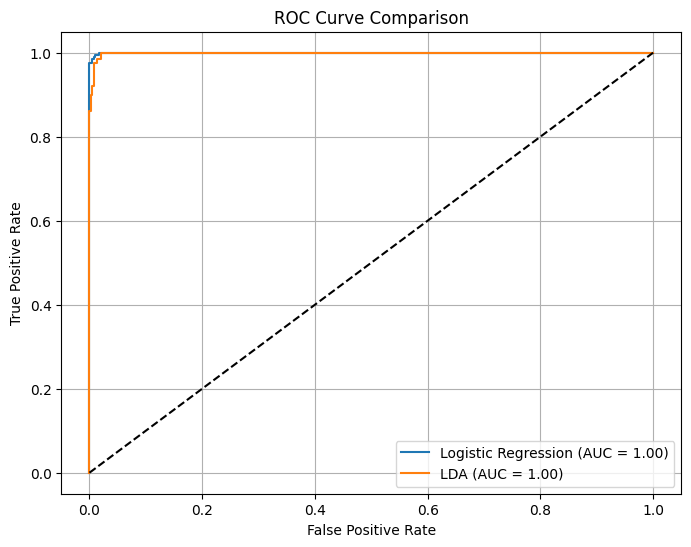

In [13]:
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {log_auc:.2f})')
plt.plot(fpr_lda, tpr_lda, label=f'LDA (AUC = {lda_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
print("Logistic Regression Confusion Matrix:\n", log_cm)
print("Accuracy:", log_acc)
print("\nLDA Confusion Matrix:\n", lda_cm)
print("Accuracy:", lda_acc)

Logistic Regression Confusion Matrix:
 [[395   4]
 [  2 199]]
Accuracy: 0.99

LDA Confusion Matrix:
 [[367  32]
 [  0 201]]
Accuracy: 0.9466666666666667
